In [1]:
import os
import subprocess

In [2]:
import re

def distributeGaps(gappedReference, ungappedString):
    assert len(gappedReference.replace('-','')) == len(ungappedString), 'ungapped strings should be equal' 
    result = list(ungappedString)
    gaplist = [ m.start() for m in re.finditer('-', gappedReference)]

    for gap in gaplist:    
        result.insert(gap, '-')
    result = "".join(result)    
    return result

assert(distributeGaps('--abcdef-g-', 'bombasi') == '--bombas-i-')

In [3]:
lista_fam_filter2=os.listdir('bear_filtered/')
print len(lista_fam_filter2)

1270


In [4]:
c=0
for famiglia in lista_fam_filter2:
    c+=1
    o=open('bear_alignment/'+famiglia, "w")
    f=open('bear_filtered/'+famiglia)
    line=f.readline()
    while(line):
        if line[0]==">":
            name=line[1:-1]
            #output=subprocess.check_output("wc -l not_similar/"+fam, shell=True)
            seq_alignment=subprocess.check_output('grep '+name+' Rfam.seed', shell=True)
            line=f.readline()
            prova=distributeGaps(seq_alignment.split()[1], line[0:-1])

            line=f.readline()
            line=f.readline()
            bear_seq=line

            gap_pos=[]
            for i, el in enumerate(prova):
                if el=='-':
                    gap_pos.append(i)

            for i in gap_pos:
                bear_seq=bear_seq[:i] + "-" + bear_seq[i:]

            #print prova
            #print bear_seq
            o.write(bear_seq)
        else:
            line=f.readline()
    o.close()
    
    print famiglia+"\t"+str(c)+" famiglie su 1270"

RF00131.folded	1 famiglie su 1270
RF00660.folded	2 famiglie su 1270
RF00386.folded	3 famiglie su 1270
RF00031.folded	4 famiglie su 1270
RF01506.folded	5 famiglie su 1270
RF00760.folded	6 famiglie su 1270
RF00286.folded	7 famiglie su 1270
RF00875.folded	8 famiglie su 1270
RF00808.folded	9 famiglie su 1270
RF02266.folded	10 famiglie su 1270
RF02437.folded	11 famiglie su 1270
RF02680.folded	12 famiglie su 1270
RF02205.folded	13 famiglie su 1270
RF00398.folded	14 famiglie su 1270
RF01418.folded	15 famiglie su 1270
RF01518.folded	16 famiglie su 1270
RF02278.folded	17 famiglie su 1270
RF01183.folded	18 famiglie su 1270
RF00152.folded	19 famiglie su 1270
RF00603.folded	20 famiglie su 1270
RF00052.folded	21 famiglie su 1270
RF00703.folded	22 famiglie su 1270
RF01234.folded	23 famiglie su 1270
RF00772.folded	24 famiglie su 1270
RF00023.folded	25 famiglie su 1270
RF01514.folded	26 famiglie su 1270
RF00394.folded	27 famiglie su 1270
RF00672.folded	28 famiglie su 1270
RF01414.folded	29 famiglie su

In [5]:
famiglie_bear=os.listdir('bear_alignment/')
print len(famiglie_bear)

1270


In [6]:
alph_bear={'abc':'a', 'def':'A', 'ghi=':'=',
          'lmnop':'l', 'qrstu':'L', 'vwxyz^':'^',
          '!"#': 'i', '$%&':'I', '\'()+':'+',
          '234':'n', '567':'N', '890>':'>',
          'ABC':'s', 'DEF':'S', 'GHIJ':'~',
          'KLMN':'b', 'OPQR':'B', 'STUVW':'|',
          'YZ~':'y', '?_|':'Y', '/\\@':'@',
          '{}[]':'[', ':':':' , '-':'-'}

In [7]:
def decode(bear):
    alph_bear={'abc':'a', 'def':'A', 'ghi=':'=',
          'lmnop':'l', 'qrstu':'L', 'vwxyz^':'^',
          '!"#': 'i', '$%&':'I', '\'()+':'+',
          '234':'n', '567':'N', '890>':'>',
          'ABC':'s', 'DEF':'S', 'GHIJ':'~',
          'KLMN':'b', 'OPQR':'B', 'STUVW':'|',
          'YZ~':'y', '?_|':'Y', '/\\@':'@',
          '{}[]':'[', ':':':' , '-':'-'}
    
    result=""
    for ch in bear:
        for key in alph_bear:
            if ch in key:
                result += alph_bear[key]
    return result

In [8]:
a="::a!!=====-===========eeeee[==========[a!-----!cccmmmmccc]a=--------------=========--e--eeee]=============-===--22a:"
print a
print decode(a)

::a!!=====-===========eeeee[==========[a!-----!cccmmmmccc]a=--------------=========--e--eeee]=============-===--22a:
::aii=====-===========AAAAA[==========[ai-----iaaallllaaa[a=--------------=========--A--AAAA[=============-===--nna:


In [9]:
for famiglia in famiglie_bear:
    o=open('bear_new_alignment/'+famiglia, "w")
    f=open('bear_alignment/'+famiglia)
    line=f.readline()
    while(line):
        o.write(decode(line)+"\n")
        line=f.readline()
    o.close()

In [10]:
import matplotlib.pyplot as plt

In [11]:
from collections import Counter

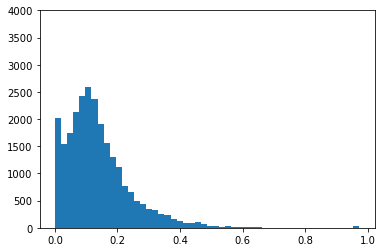

In [12]:
conta_2punti=[]
for famiglia in famiglie_bear:
    f=open("bear_new_alignment/"+famiglia)
    line=f.readline()
    while(line):
        c=Counter(line)
        conta_2punti.append(float(c[':'])/(len(line)-c['-']))
        line=f.readline()
        
        
plt.hist(conta_2punti, bins=50)
plt.ylim([0, 4000])
plt.savefig('distribution_2punti_no_gap.pdf')
plt.show()
plt.close()

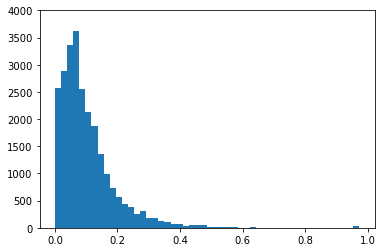

In [13]:
conta_2punti=[]
for famiglia in famiglie_bear:
    f=open("bear_new_alignment/"+famiglia)
    line=f.readline()
    while(line):
        c=Counter(line)
        conta_2punti.append(float(c[':'])/len(line))
        line=f.readline()
        
plt.hist(conta_2punti, bins=50)
plt.ylim([0, 4000])
plt.savefig('distribution_2punti_gap.pdf')
plt.show()
plt.close()